In [382]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [383]:
df = pd.read_csv("Superstore Sales.csv")

In [384]:
df.head()

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name
0,1,3,10/13/2010,10-01-2010,Low,6,261.5400,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,49,293,10-01-2012,10-01-2012,High,49,10123.0200,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,50,293,10-01-2012,10-01-2012,High,27,244.5700,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl"
3,80,483,07-10-2011,07-01-2011,High,30,4965.7595,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,85,515,8/28/2010,08-01-2010,Not Specified,19,394.2700,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Month Year            8399 non-null   object 
 4   Order Priority        8399 non-null   object 
 5   Order Quantity        8399 non-null   int64  
 6   Sales                 8399 non-null   float64
 7   Customer Name         8399 non-null   object 
 8   Province              8399 non-null   object 
 9   Region                8399 non-null   object 
 10  Product Category      8399 non-null   object 
 11  Product Sub-Category  8399 non-null   object 
 12  Product Name          8399 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 853.1+ KB


In [386]:
df.shape

(8399, 13)

In [387]:
df["Order Date"].value_counts()

3/28/2012     20
9/15/2011     20
12-12-2010    18
08-04-2010    17
4/20/2010     17
              ..
11-12-2012     1
10/26/2009     1
07-06-2012     1
07-10-2010     1
11-02-2012     1
Name: Order Date, Length: 1418, dtype: int64

In [388]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Month Year"] = pd.to_datetime(df["Month Year"])

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   datetime64[ns]
 3   Month Year            8399 non-null   datetime64[ns]
 4   Order Priority        8399 non-null   object        
 5   Order Quantity        8399 non-null   int64         
 6   Sales                 8399 non-null   float64       
 7   Customer Name         8399 non-null   object        
 8   Province              8399 non-null   object        
 9   Region                8399 non-null   object        
 10  Product Category      8399 non-null   object        
 11  Product Sub-Category  8399 non-null   object        
 12  Product Name          8399 non-null   object        
dtypes: datetime64[ns](

#### Inference
*There are 4 numerical,7 categorical and 2 date type variables
*convert the datatype of Order ID column from numerical to object.

In [390]:
df["Sales"]=df["Sales"].round(2)

In [391]:
df.head()

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name
0,1,3,2010-10-13,2010-10-01,Low,6,261.54,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,49,293,2012-10-01,2012-10-01,High,49,10123.02,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,50,293,2012-10-01,2012-10-01,High,27,244.57,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl"
3,80,483,2011-07-10,2011-07-01,High,30,4965.76,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,85,515,2010-08-28,2010-08-01,Not Specified,19,394.27,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier


In [392]:
# Converting Data Types
df["Row ID"] = df["Row ID"].astype("object")
df["Order ID"] = df["Order ID"].astype("object")

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   object        
 1   Order ID              8399 non-null   object        
 2   Order Date            8399 non-null   datetime64[ns]
 3   Month Year            8399 non-null   datetime64[ns]
 4   Order Priority        8399 non-null   object        
 5   Order Quantity        8399 non-null   int64         
 6   Sales                 8399 non-null   float64       
 7   Customer Name         8399 non-null   object        
 8   Province              8399 non-null   object        
 9   Region                8399 non-null   object        
 10  Product Category      8399 non-null   object        
 11  Product Sub-Category  8399 non-null   object        
 12  Product Name          8399 non-null   object        
dtypes: datetime64[ns](

In [394]:
df_numeric=df.select_dtypes(np.number)
df_numeric.columns

Index(['Order Quantity', 'Sales'], dtype='object')

In [395]:
df_cat=df.select_dtypes(include = "object")
df_cat.columns

Index(['Row ID', 'Order ID', 'Order Priority', 'Customer Name', 'Province',
       'Region', 'Product Category', 'Product Sub-Category', 'Product Name'],
      dtype='object')

In [396]:
df.isnull().sum()*100/len(df)

Row ID                  0.0
Order ID                0.0
Order Date              0.0
Month Year              0.0
Order Priority          0.0
Order Quantity          0.0
Sales                   0.0
Customer Name           0.0
Province                0.0
Region                  0.0
Product Category        0.0
Product Sub-Category    0.0
Product Name            0.0
dtype: float64

In [397]:
# There are no null values in the dataset

In [398]:
for i in df_cat:
    print(i,df[i].nunique())
    print()
    print(df[i].value_counts())
    print("#"*30)

Row ID 8399

1       1
5611    1
5609    1
5608    1
5607    1
       ..
2795    1
2794    1
2793    1
2792    1
8399    1
Name: Row ID, Length: 8399, dtype: int64
##############################
Order ID 5496

43745    6
24132    6
48452    5
48772    5
57253    5
        ..
30885    1
50503    1
52035    1
9472     1
55270    1
Name: Order ID, Length: 5496, dtype: int64
##############################
Order Priority 5

High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: Order Priority, dtype: int64
##############################
Customer Name 795

Darren Budd          41
Ed Braxton           38
Brad Thomas          35
Carlos Soltero       33
Patrick Jones        30
                     ..
Natalie DeCherney     1
Craig Carreira        1
Maria Etezadi         1
Sample Company A      1
Maureen Grace         1
Name: Customer Name, Length: 795, dtype: int64
##############################
Province 13

Ontario                  18

In [399]:
df["Row ID"].nunique()

8399

#### INFERENCE
* From this we can able to infer thatall the row id's are unique so we need to drop this column
* Total of 5496 orders has been placed
* There are 5 different tyes of order priorities are there
* Totally 795 customers are there 
* 13 provinces are there totally
* 8 regions are there totally
* Totally 17 sub-category are there 
* 1263 total products are available

In [401]:
df.head(50)

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name
0,1,3,2010-10-13,2010-10-01,Low,6,261.54,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,49,293,2012-10-01,2012-10-01,High,49,10123.02,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,50,293,2012-10-01,2012-10-01,High,27,244.57,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl"
3,80,483,2011-07-10,2011-07-01,High,30,4965.76,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,85,515,2010-08-28,2010-08-01,Not Specified,19,394.27,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier
5,86,515,2010-08-28,2010-08-01,Not Specified,21,146.69,Carlos Soltero,Nunavut,Nunavut,Furniture,Office Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs
6,97,613,2011-06-17,2011-06-01,High,12,93.54,Carl Jackson,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders"
7,98,613,2011-06-17,2011-06-01,High,22,905.08,Carl Jackson,Nunavut,Nunavut,Office Supplies,Storage & Organization,"SAFCO Mobile Desk Side File, Wire Frame"
8,103,643,2011-03-24,2011-03-01,High,21,2781.82,Monica Federle,Nunavut,Nunavut,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black"
9,107,678,2010-02-26,2010-02-01,Low,44,228.41,Dorothy Badders,Nunavut,Nunavut,Office Supplies,Paper,Xerox 198


In [402]:
# dropping the row id column 
# dropping the month year column since the information which is given by this column can be explained by order date column.

In [403]:
df.drop(["Row ID","Month Year"],axis=1,inplace = True)

In [404]:
df.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name
0,3,2010-10-13,Low,6,261.54,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,293,2012-10-01,High,49,10123.02,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,293,2012-10-01,High,27,244.57,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl"
3,483,2011-07-10,High,30,4965.76,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,515,2010-08-28,Not Specified,19,394.27,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier


In [405]:
for i in df_numeric:
    print(i,df[i].nunique())
    print()
    print(df[i].value_counts())
    print("#"*30)

Order Quantity 50

31    202
4     196
39    195
46    193
24    192
23    192
42    189
3     189
43    184
41    183
50    182
29    180
20    176
8     176
26    174
7     174
48    172
6     172
16    171
10    170
32    170
36    169
25    167
15    166
5     166
47    166
1     165
12    164
34    164
30    163
45    163
19    163
27    162
33    161
21    158
14    158
44    157
38    156
9     155
37    155
18    155
2     152
17    151
35    151
11    151
40    150
13    150
28    148
22    145
49    136
Name: Order Quantity, dtype: int64
##############################
Sales 8130

151.19     3
43.29      3
127.56     3
75.19      3
20.19      3
          ..
3491.71    1
139.54     1
227.66     1
861.41     1
441.99     1
Name: Sales, Length: 8130, dtype: int64
##############################


In [406]:
print('Skewness of the variable are:')
print(df_numeric.skew())

Skewness of the variable are:
Order Quantity   -0.017318
Sales             5.386982
dtype: float64


#### INFERENCE
* As we know, if skew values are <0 left skewed; =0 normally distributed/symetric distribution; >0 right skewed.
* Order Quantity is left skewed and Sales is Right Skewed.


In [407]:
print('Kurtosis of the variable are:')
print(df_numeric.kurt())

Kurtosis of the variable are:
Order Quantity    -1.208020
Sales             60.928376
dtype: float64


#### INFERENCE
* As we know if kurt values are <0 platykurtic; =0 mesokurtic; >0 leptokurtic
* We can infer that Order Quantity is Platykurtic and Sales is Leptokurtic

## VISUALISATION OF DATA

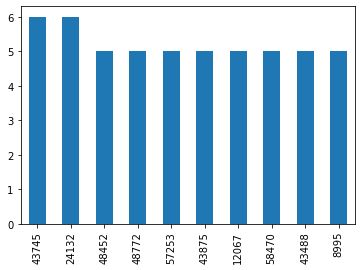

In [408]:
df["Order ID"].value_counts().head(10).plot(kind="bar")
plt.show()

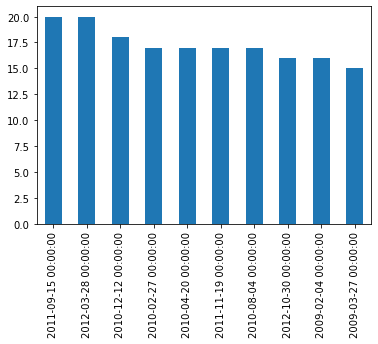

In [409]:
df["Order Date"].value_counts().head(10).plot(kind="bar")
plt.show()

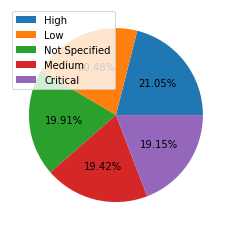

In [410]:
order_priority_counts = df["Order Priority"].value_counts()
plt.pie(order_priority_counts,autopct = "%.2f%%")
plt.legend(order_priority_counts.index,loc ="upper left")
plt.show()

### Count Plot of Product Category


Office Supplies    4610
Technology         2065
Furniture          1724
Name: Product Category, dtype: int64


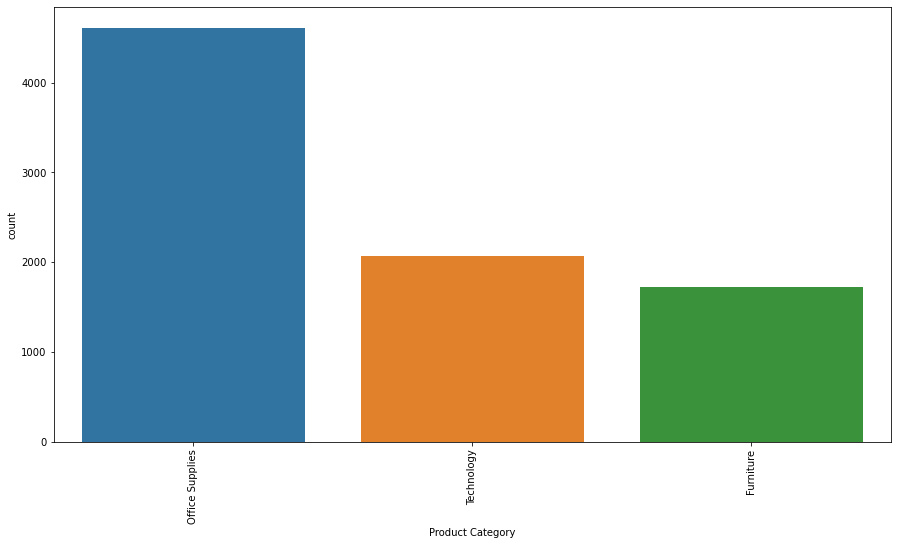

In [411]:
print(df["Product Category"].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df["Product Category"])
plt.xticks(rotation=90)
plt.show()

### Pie Chart for Product Sub-Category

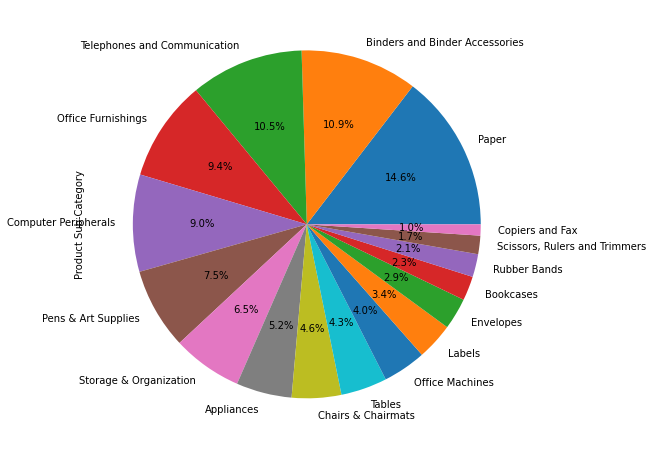

In [412]:
plt.figure(figsize=(10,8))
df["Product Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Count plot of Product Sub-Category

Paper                             1225
Binders and Binder Accessories     915
Telephones and Communication       883
Office Furnishings                 788
Computer Peripherals               758
Pens & Art Supplies                633
Storage & Organization             546
Appliances                         434
Chairs & Chairmats                 386
Tables                             361
Office Machines                    337
Labels                             288
Envelopes                          246
Bookcases                          189
Rubber Bands                       179
Scissors, Rulers and Trimmers      144
Copiers and Fax                     87
Name: Product Sub-Category, dtype: int64


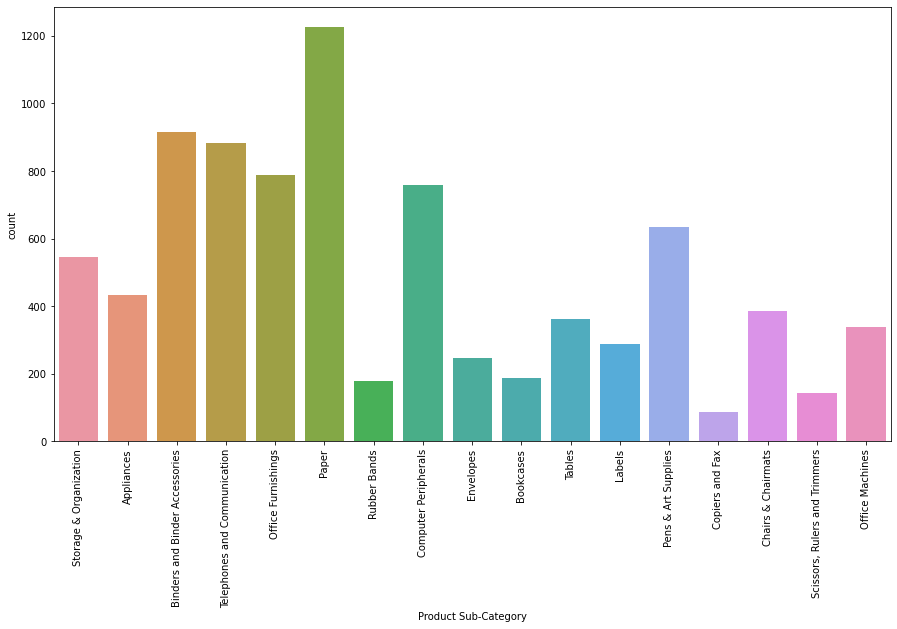

In [413]:
print(df["Product Sub-Category"].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df["Product Sub-Category"])
plt.xticks(rotation=90)
plt.show()

### Count Plot Of Province

Ontario                  1826
British Columbia         1126
Saskachewan               913
Alberta                   865
Manitoba                  793
Quebec                    781
Yukon                     542
Nova Scotia               464
Northwest Territories     394
New Brunswick             323
Prince Edward Island      211
Newfoundland               82
Nunavut                    79
Name: Province, dtype: int64


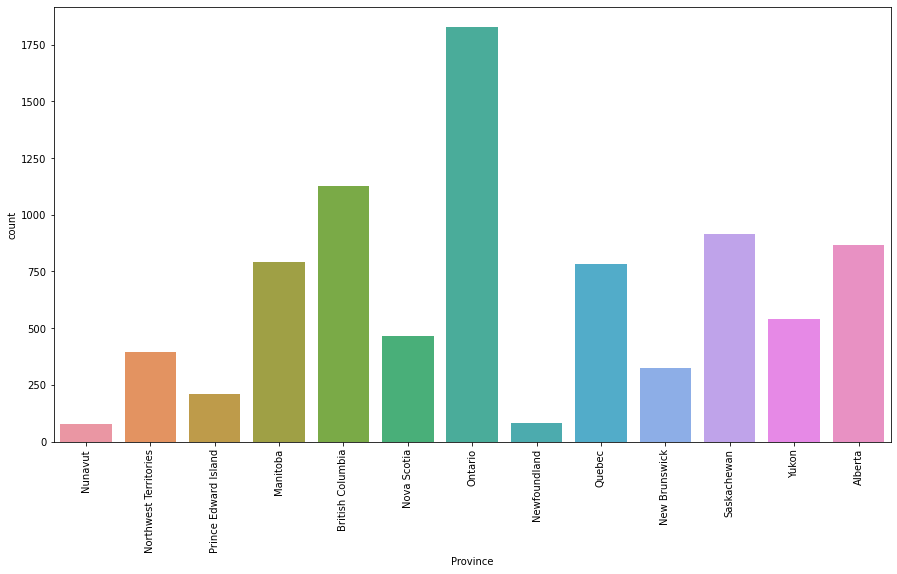

In [414]:
print(df["Province"].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df["Province"])
plt.xticks(rotation=90)
plt.show()

## Count Plot of Region

West                     1991
Ontario                  1826
Prarie                   1706
Atlantic                 1080
Quebec                    781
Yukon                     542
Northwest Territories     394
Nunavut                    79
Name: Region, dtype: int64


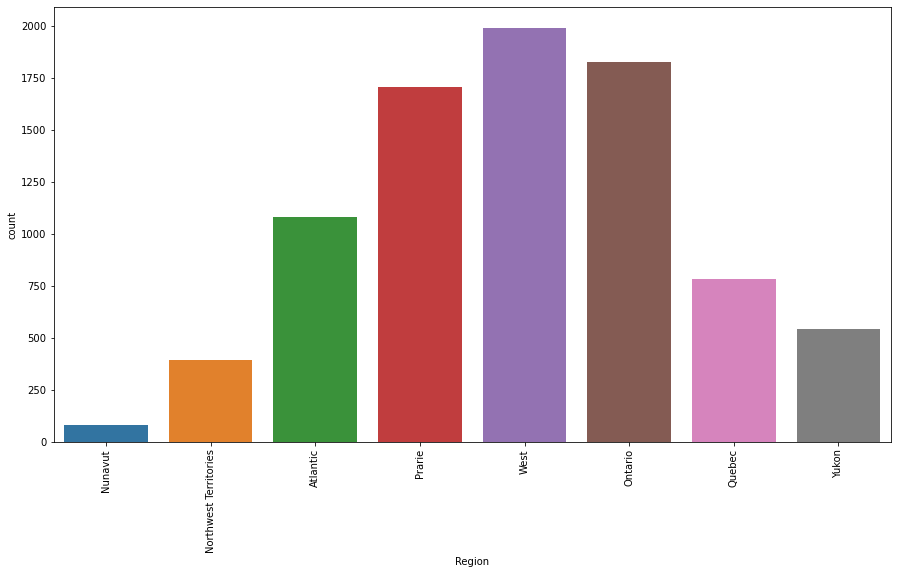

In [415]:
print(df["Region"].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df["Region"])
plt.xticks(rotation=90)
plt.show()

###  Heat Map of Correlation among the columns

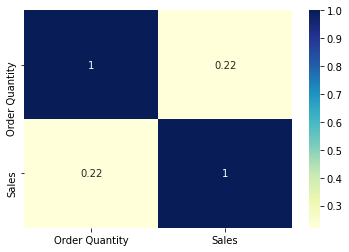

In [418]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Heat Map of Covariance among the columns

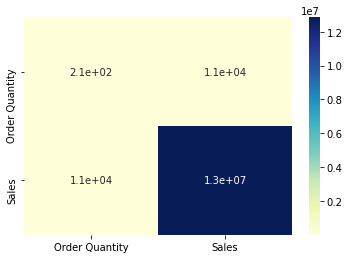

In [419]:
sns.heatmap(df.cov(),annot=True,cmap="YlGnBu")
plt.show()

## KPI KEY PERFORMANCE PREDICTORS

### Average sales per customer

In [420]:
avg_sal_cus = df.groupby("Customer Name")[["Sales"]].mean()

avg_sal_cus_n = avg_sal_cus.sort_values(by ="Sales",ascending=False)

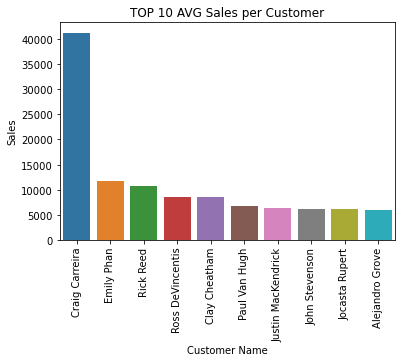

In [421]:
sns.barplot(x = avg_sal_cus_n.head(10).index,y =avg_sal_cus_n["Sales"].head(10) )
plt.xticks(rotation="90")
plt.title("TOP 10 AVG Sales per Customer")
plt.show()

#### Inference
* Craig Carreira is the top customer as per average sales

### Average Transaction Size by Product Category

In [422]:
avg_trasc_prd = df.groupby("Product Category")["Sales"].mean()

In [423]:
avg_trasc_prd

Product Category
Furniture          3003.822802
Office Supplies     814.048178
Technology         2897.941070
Name: Sales, dtype: float64

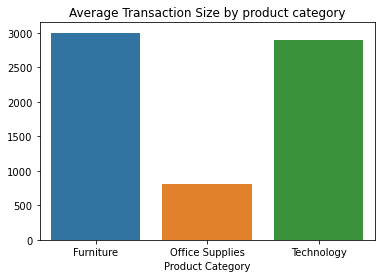

In [424]:
sns.barplot(x = avg_trasc_prd.index ,y = avg_trasc_prd.values)
plt.title("Average Transaction Size by product category")
plt.show()

#### Inference
* Furniture has the highest Average Transaction Size by Product Category.

In [425]:
df.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name
0,3,2010-10-13,Low,6,261.54,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,293,2012-10-01,High,49,10123.02,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,293,2012-10-01,High,27,244.57,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl"
3,483,2011-07-10,High,30,4965.76,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,515,2010-08-28,Not Specified,19,394.27,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier


## Recency ( How recently a customer has made a purchase)

In [431]:
maximum=max(df["Order Date"])
print(maximum)

2012-12-30 00:00:00


In [432]:
reference_date = pd.to_datetime('2012-12-30')

In [433]:
recency=df.groupby(["Customer Name"]).agg({"Order Date":lambda x:((reference_date-x.max()).days)})
recency

,Order Date
Customer Name,
Aaron Bergman,582
Aaron Hawkins,367
Aaron Smayling,346
Adam Bellavance,89
Adam Hart,19
...,...
Vivian Mathis,54
William Brown,10
Xylona Price,24


Here we use the groupby() function to group the data by the "Customer Name" column,and 
{"Order Date": lambda x: (reference_date - x.max()).days} is used to calculate the recency by subtracting 
the maximum order date from the reference date for each customer. The resulting recency values 
are aggregated using the .agg() function.

## Frequeny (How often a customer makes a purchase)

In [434]:
freq=df.groupby('Customer Name')['Order ID'].count()

In [435]:
freq

Customer Name
Aaron Bergman       7
Aaron Hawkins      12
Aaron Smayling     14
Adam Bellavance    12
Adam Hart          27
                   ..
Vivian Mathis      15
William Brown      23
Xylona Price       14
Yana Sorensen       6
Yoseph Carroll      9
Name: Order ID, Length: 795, dtype: int64

In [436]:
sorted_frequency = freq.sort_values(ascending=False).head(10)

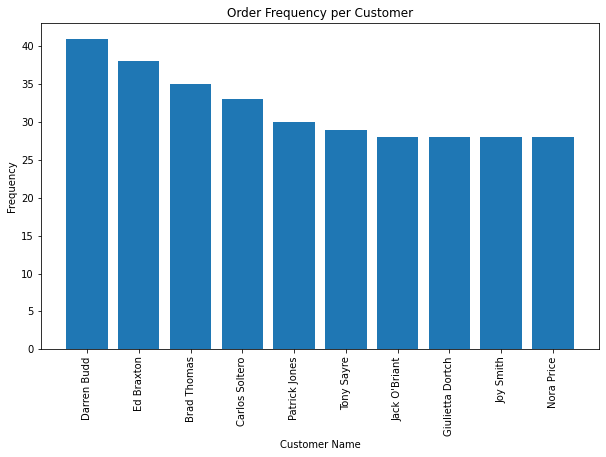

In [437]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_frequency.index, sorted_frequency.values)
plt.xlabel('Customer Name')
plt.ylabel('Frequency')
plt.title('Order Frequency per Customer')
plt.xticks(rotation=90)
plt.show()

## Monetary (How much money a customer spends on purchases)

In [438]:
monetary=df.groupby('Customer Name')['Sales'].sum()

In [439]:
monetary

Customer Name
Aaron Bergman      11630.59
Aaron Hawkins      27690.73
Aaron Smayling      8835.32
Adam Bellavance    11577.58
Adam Hart          26114.26
                     ...   
Vivian Mathis      29420.89
William Brown      38872.59
Xylona Price       18037.09
Yana Sorensen       1987.16
Yoseph Carroll     10535.32
Name: Sales, Length: 795, dtype: float64

In [440]:
sorted_monetary =monetary.sort_values(ascending=False).head(10)

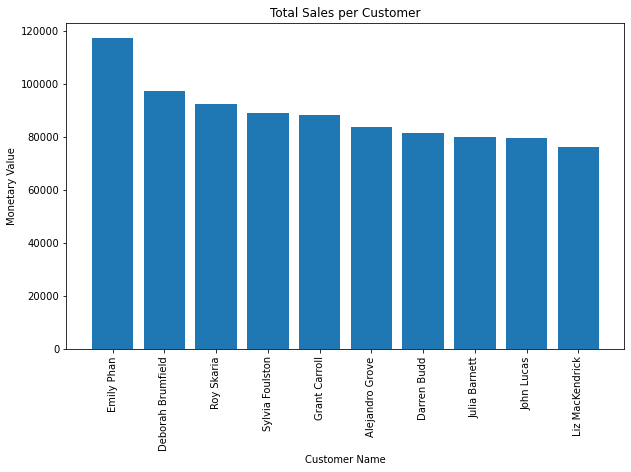

In [441]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_monetary.index, sorted_monetary.values)
plt.xlabel('Customer Name')
plt.ylabel('Monetary Value')
plt.title('Total Sales per Customer')
plt.xticks(rotation=90)
plt.show()

In [442]:
RFM=pd.concat([recency,freq,monetary],axis=1)


In [443]:
RFM

,Order Date,Order ID,Sales
Customer Name,,,
Aaron Bergman,582,7,11630.59
Aaron Hawkins,367,12,27690.73
Aaron Smayling,346,14,8835.32
Adam Bellavance,89,12,11577.58
Adam Hart,19,27,26114.26
...,...,...,...
Vivian Mathis,54,15,29420.89
William Brown,10,23,38872.59
Xylona Price,24,14,18037.09


In [444]:
column_mapping = {'Order Date': 'Recency',
                  'Order ID': 'Frequency',
                  'Sales': 'Monetary'}

# Use the rename() function to update the column names
RFM =RFM.rename(columns=column_mapping)

print(RFM)

                 Recency  Frequency  Monetary
Customer Name                                
Aaron Bergman        582          7  11630.59
Aaron Hawkins        367         12  27690.73
Aaron Smayling       346         14   8835.32
Adam Bellavance       89         12  11577.58
Adam Hart             19         27  26114.26
...                  ...        ...       ...
Vivian Mathis         54         15  29420.89
William Brown         10         23  38872.59
Xylona Price          24         14  18037.09
Yana Sorensen        132          6   1987.16
Yoseph Carroll        73          9  10535.32

[795 rows x 3 columns]


In [445]:
from sklearn.preprocessing import StandardScaler

In [446]:
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

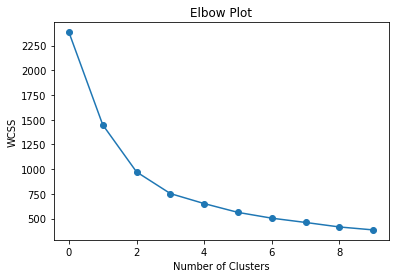

In [447]:
wcss=[]
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
plt.plot(inertia,marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()



In [448]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [449]:
RFM

,Recency,Frequency,Monetary,Clusters
Customer Name,,,,
Aaron Bergman,582,7,11630.59,2
Aaron Hawkins,367,12,27690.73,1
Aaron Smayling,346,14,8835.32,1
Adam Bellavance,89,12,11577.58,1
Adam Hart,19,27,26114.26,3
...,...,...,...,...
Vivian Mathis,54,15,29420.89,3
William Brown,10,23,38872.59,3
Xylona Price,24,14,18037.09,1


In [451]:
group=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()
group

,Recency,Frequency,Monetary
Clusters,,,
1,157.682819,8.444934,13042.238568
2,648.389706,5.897059,8944.858456
3,123.712195,18.356098,37941.092000


#### Inference 
* We can infer that cluster 2 has the highest Recency value and lowest frequency and monetary value.
* And cluster 3 has the lowest recency and highest frequency and monetary value.
* Cluster 1 has better recency value than cluster 2 but lesser frequency and monetary value when compared to cluster 3.

In [452]:
def func(row):
    if row["Clusters"]==1:
        return "Core Customers"
    elif row["Clusters"]==3:
        return "Whale Customers"
    else:
        return "Lapsed Customers"

In [453]:
RFM["Customer Segment"]=RFM.apply(func,axis=1)

In [454]:
RFM

,Recency,Frequency,Monetary,Clusters,Customer Segment
Customer Name,,,,,
Aaron Bergman,582,7,11630.59,2,Lapsed Customers
Aaron Hawkins,367,12,27690.73,1,Core Customers
Aaron Smayling,346,14,8835.32,1,Core Customers
Adam Bellavance,89,12,11577.58,1,Core Customers
Adam Hart,19,27,26114.26,3,Whale Customers
...,...,...,...,...,...
Vivian Mathis,54,15,29420.89,3,Whale Customers
William Brown,10,23,38872.59,3,Whale Customers
Xylona Price,24,14,18037.09,1,Core Customers


#### 1. Lapsed customers" refers to customers who were previously engaged with your business but have
#### not made any recent purchases or interactions.
#### These customers were once active and valuable to your business but have now become inactive.

#### 2. Whale customers is a term used to describe highly valuable and high-spending customers 
#### for a business. These customers make significant and frequent purchases, 
#### contributing a substantial portion of the company's revenue.

#### 3. The term Core Customers implies that they form a foundational 
#### and reliable customer segment for your business. These customers may not have the 
#### highest spending or frequency of purchases compared to whale customers, 
#### but they still contribute consistently to your revenue 

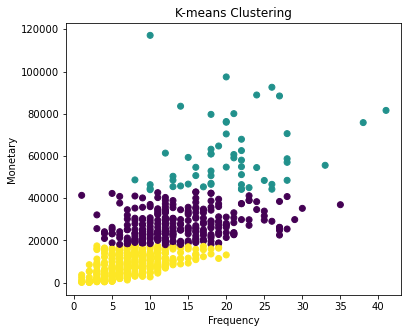

In [461]:
X = RFM[['Recency', 'Frequency', 'Monetary']]

# Fit K-means clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
RFM['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(6, 5))
plt.scatter(X['Frequency'], X['Monetary'], c=RFM['Cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('K-means Clustering')
plt.show()

In [455]:
result=RFM["Customer Segment"].value_counts()

In [456]:
result

Core Customers      454
Whale Customers     205
Lapsed Customers    136
Name: Customer Segment, dtype: int64

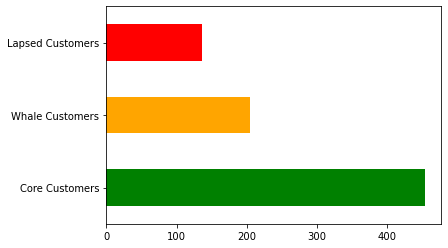

In [457]:
result.plot(kind="barh",color=["Green","Orange","Red"])
plt.show()

#### Inference
#### From our Customer Segmentation Process we can infer that:
#### The "Core customers" are high in number followed by "Whale Customers" and then "Lapsed Customers".